In [134]:
import yfinance as yf

Import all the stock data from yfinance

Let's pick a stock

In [135]:
apple = yf.Ticker("AAPL")

Lets grab the historical data for apple stock

In [136]:
apple = yf.Ticker("AAPL").history(period="max")

In [137]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,0.0,0.0
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0


Let's plot the stock price on a chart

<Axes: xlabel='Date'>

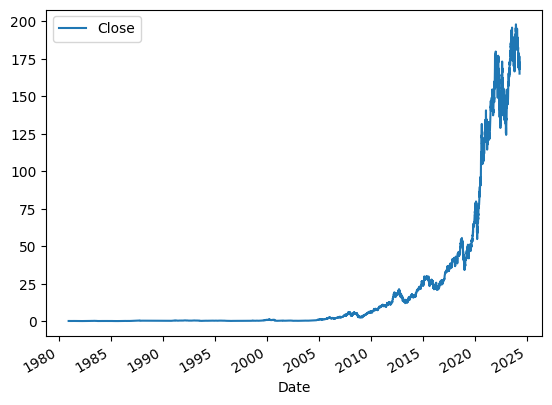

In [138]:
apple.plot.line(y="Close", use_index=True)

Let's get rid of extra columns that we don't need  

In [139]:
del apple["Dividends"]
del apple["Stock Splits"]

In [140]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600
...,...,...,...,...,...
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200


So now we need to ensure we are training our model to predict an increase or decrease in stock price
We need to work on "Will the stock go up and down"
We will create a column 'Tomorrow' that shows the stocks tomorrows price


In [141]:
apple["Tomorrow"] = apple["Close"].shift(-1)

Now we would like to get an indicator on if tomorrow's price was greater or less than yesterday's stock price
We want the 'Target' value to return a boolean indicating if'1' the price has increased.
If '0' the price has decreased
So lets set up our target.

Check to see if tomorrow value works

In [142]:
apple

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087117
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.089273
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467
...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,169.380005
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,168.000000
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,167.039993


In [143]:
# Assuming 'Close' is the price column you're using
apple["Tomorrow"] = apple["Close"].shift(-1)  # Shift 'Close' up to make 'Tomorrow' column
apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)  # Create 'Target' column as 1 or 0

# Check if the 'Target' column is correctly added
print("Columns after adding Target:", apple.columns)


Columns after adding Target: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')


Lets have a look at the data now:

In [144]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017,0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087117,0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.089273,1
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861,1
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467,1
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,169.380005,0
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,168.000000,0
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,167.039993,0


Now lets train our machine learning model:

We are going to use RandomForestClassifier
This works by training decision trees by randomisers and then averaging the results.
Resistant to over fit
Can pick up non-linear relationship

n_estimator: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

min_samples_split: Protects us against overfitting. Usually it will be able to generalize the pattern on the new data. It is easy to go too deep in the tree, and to fit the parameters that are specific for that training set, rather than to generalize to the whole dataset. The higher you set it the higher the chances of your model being less accurate.
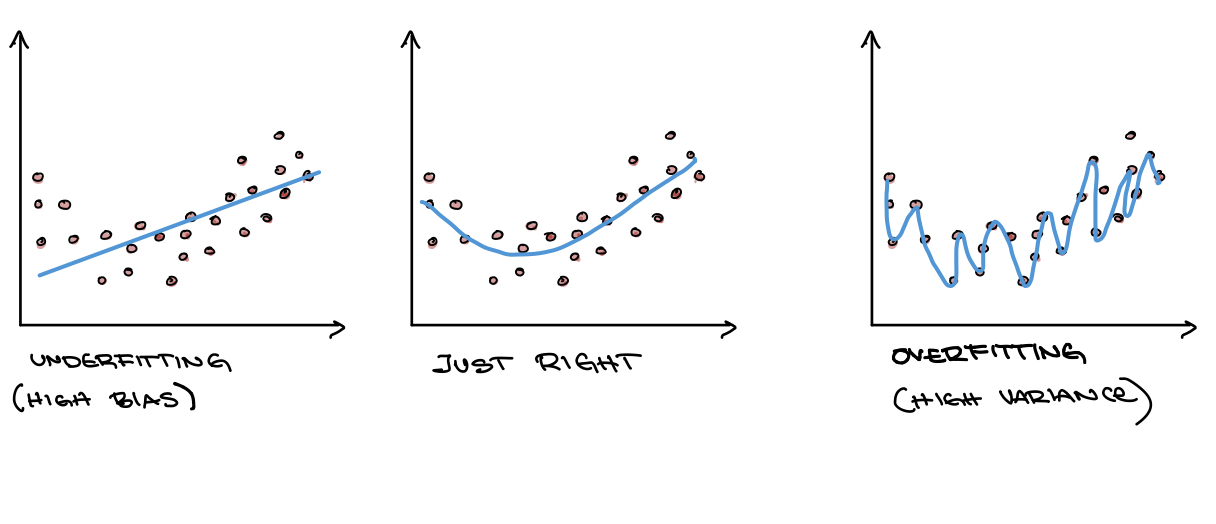

random_state: Controls the random number generator used to shuffle the data before splitting it. In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data. By setting “random_state,” you ensure that the results of your experiments are reproducible, even if you rerun the code several times.

train:  Selects all the rows from the apple DataFrame except for the last 100 to use as the training dataset.

test:  The last 100 rows of the apple DataFrame to use as the testing dataset.






In [145]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = apple.iloc[:-100]
test = apple.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Let's measure how accurate our model is?

precision_score(): Computes the precision of the predictions by comparing preds against test["Target"].

In [146]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [147]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

Let's calculate the precision score against the target

In [148]:
precision_score(test["Target"], preds)

0.4523809523809524

Not so great :/ because this means it's only right 39% of the times it tells you that you should go out and buy the apple stock and it will go up

Lets combine our actual values with predicted values:

In [149]:
combined = pd.concat([test["Target"], preds], axis=1)

Lets plot!

<Axes: xlabel='Date'>

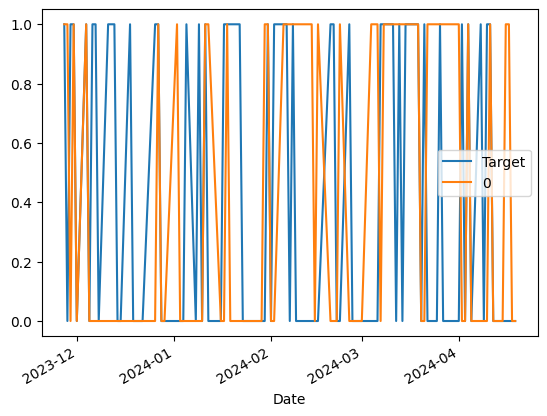

In [150]:
combined.plot()

Orange is our prediction and blue is what actually happened^

Lets now improve on how we test our algorithm
Let's create a prediction function.
so lets wrap up all our commands in one function so its easy for us!

In [151]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

Now lets backtest our model!
This will take in our data, our model and our predictors. 
Start: When you back test you want certain about of data that you would like to train the model with
Step: This means that how long you are going to be training your model for!

**Imagine you have a strategy for buying and selling stocks, and you want to know how it would have performed in the past before you trust it with real money. The backtest function does exactly that.**

Starting Point: It begins at a certain point in the past (specified by you) and looks at historical stock data from that point onwards.

Simulating Trading: The function simulates trading by using your strategy in stages. At each stage, it uses past data to decide what would have been bought or sold according to your strategy.

Recording Results: It keeps track of each trade's outcomes, noting how well the strategy would have done.

Feedback: At the end, it gives you a summary showing all the simulated trades, which helps you see how effective your strategy might be in real trading.

**In simple terms, backtesting is like a rehearsal for your trading plan to make sure it performs well based on historical data before going live. It's a critical step for any trader or investor to minimize risks and understand potential returns.**

In [152]:
import pandas as pd

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    print("Starting backtest...")  # Debug print

    for i in range(start, data.shape[0], step):
        print(f"Processing from index {i} to {i + step}")  # Debug print
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        if not train.empty and not test.empty:
            predictions = predict(train, test, predictors, model)
            all_predictions.append(predictions)
        else:
            print("Empty train or test set")  # Debug print

    if all_predictions:
        print("Backtest processing completed successfully.")  # Notify completion
        return pd.concat(all_predictions)
    else:
        print("No predictions were made.")  # Debug print
        print("Backtest processing completed with no output.")  # Notify completion
        return pd.DataFrame()  # Return empty DataFrame if no predictions



The code you see below runs a test on a trading strategy using past data (apple) and our model. It checks how often the model predicts each outcome (like a buy or sell decision).
It will also tell us how many times each type of prediction was made

In [153]:
predictions = backtest(apple, model, predictors)
if not predictions.empty:
    print(predictions["Predictions"].value_counts())
else:
    print("No predictions to display.")  # If DataFrame is empty


Starting backtest...
Processing from index 2500 to 2750
Processing from index 2750 to 3000
Processing from index 3000 to 3250
Processing from index 3250 to 3500
Processing from index 3500 to 3750
Processing from index 3750 to 4000
Processing from index 4000 to 4250
Processing from index 4250 to 4500
Processing from index 4500 to 4750
Processing from index 4750 to 5000
Processing from index 5000 to 5250
Processing from index 5250 to 5500
Processing from index 5500 to 5750
Processing from index 5750 to 6000
Processing from index 6000 to 6250
Processing from index 6250 to 6500
Processing from index 6500 to 6750
Processing from index 6750 to 7000
Processing from index 7000 to 7250
Processing from index 7250 to 7500
Processing from index 7500 to 7750
Processing from index 7750 to 8000
Processing from index 8000 to 8250
Processing from index 8250 to 8500
Processing from index 8500 to 8750
Processing from index 8750 to 9000
Processing from index 9000 to 9250
Processing from index 9250 to 9500

0  -  5252 : This is the amount of times it has said the price will go down

1  - 3177 : This is the amount of times it has said the price will go up

Lets check the score:

In [154]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5012383900928793

Nice we are now at 50% accuracy. Not good Not bad

Now this will give us a nice percentage



In [155]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.507534
0    0.492466
Name: count, dtype: float64

In [156]:
apple = apple.dropna()

In [157]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017,0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087117,0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.089273,1
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861,1
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467,1
...,...,...,...,...,...,...,...
2024-04-12 00:00:00-04:00,174.259995,178.360001,174.210007,176.550003,101593300,172.690002,0
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,169.380005,0
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,168.000000,0


The apple stock that we are analysing actually went up
50% of the days
And went down
49% of the days

Adding additional predictors

**Now we look at some new features for a dataset based on historical stock prices (apple). It's designed to help understand stock price trends and behaviors over different time frames.**

Time Frames: It considers several time frames (like 2 days, 5 days, up to 1000 days) to look at the stock's behavior.

Calculations:

Rolling Averages: For each time frame, it calculates the average closing price.
Price Ratios: It then creates a ratio of the current closing price to the average, helping identify if the stock is performing above or below its recent average.

Trend Analysis: It assesses how often the stock met a specific target in the past, summing up previous target hits or misses over each time frame.

New Predictors: These calculations form new columns ('features') in the dataset, which can be used to predict future stock movements more accurately.

**This process enhances the dataset with insights on how the stock has trended over various periods, useful for making more informed trading decisions.**

In [158]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_average = apple.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    apple[ratio_column] = apple["Close"] / rolling_average["Close"]

    trend_column = f"Trend_{horizon}"
    apple[trend_column] = apple.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]
    


C:\Users\user\AppData\Local\Temp\ipykernel_8588\1842182461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple[ratio_column] = apple["Close"] / rolling_average["Close"]
C:\Users\user\AppData\Local\Temp\ipykernel_8588\1842182461.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple[trend_column] = apple.shift(1).rolling(horizon).sum()["Target"]
C:\Users\user\AppData\Local\Temp\ipykernel_8588\1842182461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [159]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087117,0,0.973216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.089273,1,0.961903,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861,1,1.012224,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467,1,1.014289,2.0,0.995331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 00:00:00-04:00,174.259995,178.360001,174.210007,176.550003,101593300,172.690002,0,1.004295,2.0,1.029458,3.0,0.984069,26.0,0.976384,127.0,1.197630,522.0
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,169.380005,0,0.988947,1.0,1.001996,3.0,0.963959,25.0,0.954861,126.0,1.170607,522.0
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,168.000000,0,0.990324,0.0,0.983121,2.0,0.947416,24.0,0.936480,125.0,1.147389,521.0


Lets get rid of NAN's

In [160]:
apple = apple.dropna()

In [161]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1984-11-26 00:00:00-05:00,0.082804,0.082804,0.082804,0.082804,100643200,0.084960,1,1.005235,2.0,1.040088,4.0,0.952146,24.0,0.906020,112.0,0.889458,450.0
1984-11-27 00:00:00-05:00,0.084960,0.085823,0.084960,0.084960,127411200,0.089273,1,1.012852,2.0,1.042327,5.0,0.978152,25.0,0.928999,113.0,0.912708,451.0
1984-11-28 00:00:00-05:00,0.089273,0.091430,0.089273,0.089273,410524800,0.087548,0,1.024751,2.0,1.065907,5.0,1.028057,26.0,0.975271,114.0,0.959014,452.0
1984-11-29 00:00:00-05:00,0.089273,0.089273,0.087548,0.087548,174876800,0.085392,0,0.990244,1.0,1.026287,4.0,1.008777,26.0,0.955705,113.0,0.940500,451.0
1984-11-30 00:00:00-05:00,0.087548,0.088410,0.084960,0.085392,108707200,0.084098,0,0.987532,0.0,0.992979,3.0,0.985074,25.0,0.931571,112.0,0.917401,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 00:00:00-04:00,174.259995,178.360001,174.210007,176.550003,101593300,172.690002,0,1.004295,2.0,1.029458,3.0,0.984069,26.0,0.976384,127.0,1.197630,522.0
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,169.380005,0,0.988947,1.0,1.001996,3.0,0.963959,25.0,0.954861,126.0,1.170607,522.0
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,168.000000,0,0.990324,0.0,0.983121,2.0,0.947416,24.0,0.936480,125.0,1.147389,521.0


Lets improve our model

estimators changed to 200 and reduce the min sample split to 50

In [162]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


Let's rewrite it a bit and have a bit more control

lets use the predict proba 

In [163]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds [preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [164]:
predictions = backtest(apple, model, new_predictors)

Starting backtest...
Processing from index 2500 to 2750


Processing from index 2750 to 3000
Processing from index 3000 to 3250
Processing from index 3250 to 3500
Processing from index 3500 to 3750
Processing from index 3750 to 4000
Processing from index 4000 to 4250
Processing from index 4250 to 4500
Processing from index 4500 to 4750
Processing from index 4750 to 5000
Processing from index 5000 to 5250
Processing from index 5250 to 5500
Processing from index 5500 to 5750
Processing from index 5750 to 6000
Processing from index 6000 to 6250
Processing from index 6250 to 6500
Processing from index 6500 to 6750
Processing from index 6750 to 7000
Processing from index 7000 to 7250
Processing from index 7250 to 7500
Processing from index 7500 to 7750
Processing from index 7750 to 8000
Processing from index 8000 to 8250
Processing from index 8250 to 8500
Processing from index 8500 to 8750
Processing from index 8750 to 9000
Processing from index 9000 to 9250
Processing from index 9250 to 9500
Processing from index 9500 to 9750
Processing from inde

Once the backtest is done and look at the value counts for the predictions

Last time we had alot more predictions

Now we should have less as we are asking the model to be abit more confident on its prediction

In [165]:
predictions["Predictions"].value_counts()

Predictions
0.0    6846
1.0     582
Name: count, dtype: int64

In [166]:
precision_score(predictions["Target"], predictions["Predictions"])

0.49312714776632305